In [32]:
!python3 --version

Python 3.9.12


In [13]:
!pip install ydata-synthetic 
!pip install pandas-profiling

ERROR: Ignored the following versions that require a different python version: 0.0.0 Requires-Python >=3.6, <3.9; 0.1.1 Requires-Python >=3.6, <3.9; 0.1.2 Requires-Python >=3.6, <3.9; 0.1.3 Requires-Python >=3.6, <3.9; 0.2.0 Requires-Python >=3.6, <3.9; 0.2.1 Requires-Python >=3.6, <3.9; 0.2.2 Requires-Python >=3.6, <3.9; 0.2.3 Requires-Python >=3.6, <3.9; 0.2.4 Requires-Python >=3.6, <3.9; 0.3.0 Requires-Python >=3.6, <3.9; 0.3.1 Requires-Python >=3.6, <3.9; 0.3.2 Requires-Python >=3.6, <3.9; 0.3.3 Requires-Python >=3.6, <3.9; 0.3.4 Requires-Python >=3.6, <3.9; 0.4.0 Requires-Python >=3.6, <3.9; 0.5.0 Requires-Python >=3.6, <3.9; 0.6.0 Requires-Python >=3.6, <3.9; 0.6.1 Requires-Python >=3.6, <3.9; 0.7.0 Requires-Python >=3.6, <3.9; 0.7.1 Requires-Python >=3.6, <3.9; 0.8.0 Requires-Python >=3.6, <3.9
ERROR: Could not find a version that satisfies the requirement ydata-synthetic (from versions: none)
ERROR: No matching distribution found for ydata-synthetic
     ━━━━━━━━━━━━━━━━━━━━━━━

In [33]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from numpy import array, random, sum, unique
from pandas import DataFrame, read_csv

from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
from ydata_synthetic.synthesizers.regular import WGAN_GP
from pandas_profiling import ProfileReport

from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler



ModuleNotFoundError: No module named 'ydata_synthetic'

In [4]:
df=pd.read_csv("/Users/mertdil/Documents/Graduation_Project/root_dataset/output/MissingET.csv")
df.drop(['subentry',"entry"], axis=1 ,inplace=True)
df

,MissingET.MET,MissingET.Eta,MissingET.Phi
0,36.214090,-3.492586,-0.004263
1,47.813580,3.278284,-2.217949
2,86.990875,-1.691697,2.479192
3,135.491090,3.139670,-1.709309
4,46.716310,-3.652405,2.502415
...,...,...,...
112692,145.078250,-2.466188,2.860018
112693,176.645450,-3.355277,2.284243
112694,92.884580,0.887530,-2.000315
112695,57.419380,-3.322350,-0.373723


In [25]:
from pathlib import Path 
path = Path('/Users/mertdil/Documents/Graduation_Project/root_dataset/output/MissingET.csv') 
data=pd.read_csv(path)
print(data.columns)
df=data
df

Index(['entry', 'subentry', 'MissingET.MET', 'MissingET.Eta', 'MissingET.Phi'], dtype='object')


,entry,subentry,MissingET.MET,MissingET.Eta,MissingET.Phi
0,0,0,36.214090,-3.492586,-0.004263
1,1,0,47.813580,3.278284,-2.217949
2,2,0,86.990875,-1.691697,2.479192
3,3,0,135.491090,3.139670,-1.709309
4,4,0,46.716310,-3.652405,2.502415
...,...,...,...,...,...
112692,112692,0,145.078250,-2.466188,2.860018
112693,112693,0,176.645450,-3.355277,2.284243
112694,112694,0,92.884580,0.887530,-2.000315
112695,112695,0,57.419380,-3.322350,-0.373723


In [26]:
df.drop([ 'entry', 'subentry'], axis=1 ,inplace=True)
df.columns

Index(['MissingET.MET', 'MissingET.Eta', 'MissingET.Phi'], dtype='object')

In [27]:
#Choosing the categorical and numerical columns
num_cols = ['MissingET.MET', 'MissingET.Eta', 'MissingET.Phi']
cat_cols = []

#Selecting the rows of minority class from the data
#Selecting the rows of minority class from the data
train_data = df.loc[ df['MissingET.MET']<400].copy()

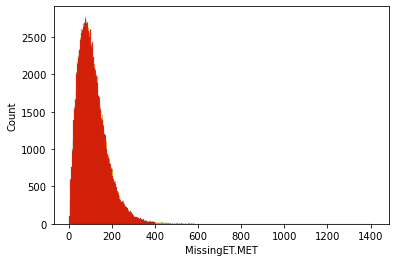

In [29]:
import seaborn as sns
#sns.distplot(df['MissingET.MET'], color = 'blue')
#plot.fig.suptitle('traing& raw data')
sns.histplot(df["MissingET.MET"],color="orange")
sns.histplot(train_data['MissingET.MET'],color = 'red')

#train kısmında kuyruk kısmı uzun tutuldu 800 çok erken öğreniyor,
#400'de excited aşamanın sağında bulunuyor(ancak grafik içerisinde)

In [35]:

print(f"Dataset info: Number of rows - {train_data.shape[0]}") 
print(f"Number of columns - {train_data.shape[1]}")
train_data

Dataset info: Number of rows - 112166
Number of columns - 3


,MissingET.MET,MissingET.Eta,MissingET.Phi
0,36.214090,-3.492586,-0.004263
1,47.813580,3.278284,-2.217949
2,86.990875,-1.691697,2.479192
3,135.491090,3.139670,-1.709309
4,46.716310,-3.652405,2.502415
...,...,...,...
112692,145.078250,-2.466188,2.860018
112693,176.645450,-3.355277,2.284243
112694,92.884580,0.887530,-2.000315
112695,57.419380,-3.322350,-0.373723


In [30]:
#WGAN with Gradient Penalty is chosen as the GAN architecture
model = WGAN


NameError: name 'WGAN' is not defined

In [13]:

#Setting the parameters of the GAN model
noise_dim = 512
dim = 128
batch_size = 64

log_step = 100
epochs = 30+1
learning_rate = 2e-4
beta_1 = 0.5
beta_2 = 0.999
models_dir = './cache'
#####124 to 64 batch_size de sağa kaydı,noise dim 32 to 256 gayet güzel bir kıvrımlı data oluştu

In [14]:

#Setting the model parameters and the training step parameters of the GAN model
gan_args = ModelParameters(batch_size=batch_size, lr=learning_rate, betas=(beta_1, beta_2),
                           noise_dim=noise_dim,layers_dim=dim)

train_args = TrainParameters(epochs=epochs, sample_interval=log_step)

In [39]:

#Initializing the GAN model
synthesizer = model(gan_args, n_critic = 10)

2022-12-20 11:40:11.907234: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [40]:

#Training the GAN model
synthesizer.train(data = train_data, train_arguments = train_args, num_cols = num_cols,cat_cols = cat_cols)

2022-12-20 11:40:14.493071: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
  0%|                                                    | 0/31 [00:00<?, ?it/s]2022-12-20 11:40:22.293236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch: 0 | disc_loss: -0.004869238939136267 | gen_loss: -0.028027554973959923


  6%|██▋                                      | 2/31 [04:24<1:03:13, 130.82s/it]

Epoch: 1 | disc_loss: 0.039818767458200455 | gen_loss: 0.030725356191396713


 10%|███▉                                     | 3/31 [06:40<1:02:14, 133.37s/it]

Epoch: 2 | disc_loss: -0.0033563238102942705 | gen_loss: 0.033573657274246216


 13%|█████▌                                     | 4/31 [08:50<59:22, 131.96s/it]

Epoch: 3 | disc_loss: -0.020274508744478226 | gen_loss: -0.09760815650224686


 16%|██████▉                                    | 5/31 [10:56<56:08, 129.55s/it]

Epoch: 4 | disc_loss: 0.012006229721009731 | gen_loss: -0.11428634822368622


 19%|████████▎                                  | 6/31 [12:54<52:23, 125.73s/it]

Epoch: 5 | disc_loss: -0.0200053621083498 | gen_loss: 0.12139786034822464


 23%|████████▌                             | 7/31 [1:17:08<8:57:47, 1344.47s/it]

Epoch: 6 | disc_loss: -0.0010661543346941471 | gen_loss: 0.008319839835166931


 26%|██████████                             | 8/31 [1:20:31<6:16:07, 981.18s/it]

Epoch: 7 | disc_loss: 0.042182765901088715 | gen_loss: 0.013666456565260887


 29%|███████████▎                           | 9/31 [1:23:15<4:26:08, 725.84s/it]

Epoch: 8 | disc_loss: 0.022394364699721336 | gen_loss: -0.0028551146388053894


 32%|████████████▎                         | 10/31 [1:26:00<3:13:22, 552.52s/it]

Epoch: 9 | disc_loss: -0.007806277833878994 | gen_loss: -0.002356739714741707


 35%|█████████████▏                       | 11/31 [2:04:34<6:03:57, 1091.87s/it]

Epoch: 10 | disc_loss: 0.014282026328146458 | gen_loss: 0.2661973237991333


 39%|██████████████▎                      | 12/31 [2:40:18<7:27:04, 1411.83s/it]

Epoch: 11 | disc_loss: -0.014812939800322056 | gen_loss: 0.24070173501968384


 42%|███████████████▌                     | 13/31 [2:50:40<5:51:44, 1172.48s/it]

Epoch: 12 | disc_loss: 0.015461587347090244 | gen_loss: 0.2798464894294739


 45%|█████████████████▏                    | 14/31 [2:53:34<4:06:44, 870.86s/it]

Epoch: 13 | disc_loss: 0.012137343175709248 | gen_loss: -0.15238192677497864


 48%|██████████████████▍                   | 15/31 [2:56:05<2:54:23, 653.97s/it]

Epoch: 14 | disc_loss: 0.011907130479812622 | gen_loss: 0.31862935423851013


 52%|███████████████████▌                  | 16/31 [2:58:20<2:04:27, 497.82s/it]

Epoch: 15 | disc_loss: 0.004341938532888889 | gen_loss: -0.4133857488632202


 55%|████████████████████▊                 | 17/31 [3:00:20<1:29:36, 384.01s/it]

Epoch: 16 | disc_loss: 0.007742876186966896 | gen_loss: 0.023509282618761063


 58%|██████████████████████                | 18/31 [3:02:19<1:05:57, 304.46s/it]

Epoch: 17 | disc_loss: 0.02604660391807556 | gen_loss: 0.022879326716065407


 61%|████████████████████████▌               | 19/31 [3:04:30<50:27, 252.28s/it]

Epoch: 18 | disc_loss: 0.09011546522378922 | gen_loss: -0.1399989128112793


 65%|█████████████████████████▊              | 20/31 [3:06:46<39:54, 217.64s/it]

Epoch: 19 | disc_loss: -0.0062768105417490005 | gen_loss: -0.3062567710876465


 68%|███████████████████████████             | 21/31 [3:09:44<34:16, 205.62s/it]

Epoch: 20 | disc_loss: 0.015315772034227848 | gen_loss: -0.08213366568088531


 71%|████████████████████████████▍           | 22/31 [3:12:30<29:03, 193.74s/it]

Epoch: 21 | disc_loss: 0.001413158606737852 | gen_loss: 0.1522252857685089


 74%|█████████████████████████████▋          | 23/31 [3:14:16<22:19, 167.46s/it]

Epoch: 22 | disc_loss: 0.026522552594542503 | gen_loss: 0.06364358961582184


 77%|██████████████████████████████▉         | 24/31 [3:15:59<17:16, 148.09s/it]

Epoch: 23 | disc_loss: -0.02416332997381687 | gen_loss: 0.26142939925193787


 81%|████████████████████████████████▎       | 25/31 [3:17:47<13:36, 136.16s/it]

Epoch: 24 | disc_loss: -0.029147760942578316 | gen_loss: -0.290475070476532


 84%|█████████████████████████████████▌      | 26/31 [3:20:43<12:19, 147.87s/it]

Epoch: 25 | disc_loss: 0.011749585159122944 | gen_loss: -0.12033181637525558


 87%|██████████████████████████████████▊     | 27/31 [3:23:21<10:04, 151.03s/it]

Epoch: 26 | disc_loss: -0.0007954565808176994 | gen_loss: -0.0918521136045456


 90%|████████████████████████████████████▏   | 28/31 [3:26:17<07:55, 158.47s/it]

Epoch: 27 | disc_loss: 0.008402558043599129 | gen_loss: -0.1914808452129364


 94%|█████████████████████████████████████▍  | 29/31 [3:30:12<06:03, 181.53s/it]

Epoch: 28 | disc_loss: 0.012143551371991634 | gen_loss: -0.20821700990200043


 97%|██████████████████████████████████████▋ | 30/31 [3:32:51<02:54, 174.70s/it]

Epoch: 29 | disc_loss: -0.0026356850285083055 | gen_loss: 0.0032746857032179832


100%|████████████████████████████████████████| 31/31 [3:35:24<00:00, 416.91s/it]

Epoch: 30 | disc_loss: 0.030383804813027382 | gen_loss: 0.006958486046642065


In [41]:
#Generating synthetic data of 100k examples of tranverse energy
synth_data = synthesizer.sample(1000000)



Synthetic data generation: 100%|█████████| 15626/15626 [01:28<00:00, 176.98it/s]


In [31]:
sns.histplot(data=synth_data, x="MissingET.MET", stat="percent", name="WGAN-GP and Delphes", discrete=True,color="green")

NameError: name 'synth_data' is not defined

<AxesSubplot:xlabel='MissingET.MET', ylabel='Percent'>

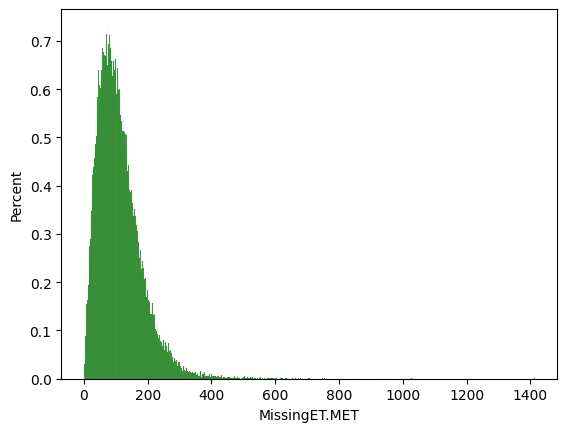

In [43]:
sns.histplot(data=df, x="MissingET.MET", stat="percent", discrete=True,color="green")

<AxesSubplot:xlabel='MissingET.MET', ylabel='Percent'>

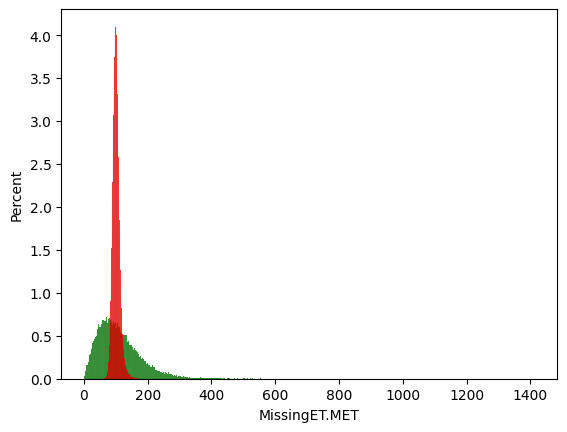

In [44]:
sns.histplot(data=df, x="MissingET.MET", stat="percent", discrete=True,color="green")
sns.histplot(data=synth_data, x="MissingET.MET", stat="percent", discrete=True,color="red")

In [498]:
synth_data

,MissingET.MET,MissingET.Eta,MissingET.Phi
0,90.418770,-4.022246,-1.977900
1,64.658203,-3.192374,-1.312011
2,76.961601,-2.468199,-1.104693
3,68.142532,-4.271749,-2.103419
4,66.961563,-3.703907,-1.626643
...,...,...,...
1000059,86.441422,-3.279633,-0.529394
1000060,84.050179,-3.492982,-2.132237
1000061,62.816692,-3.490913,-1.975626
1000062,70.020264,-3.245368,-1.013456


In [499]:
df.head()

,MissingET.MET,MissingET.Eta,MissingET.Phi
0,36.214090,-3.492586,-0.004263
1,47.813580,3.278284,-2.217949
2,86.990875,-1.691697,2.479192
3,135.491090,3.139670,-1.709309
4,46.716310,-3.652405,2.502415


In [ ]:
sns.histplot(data=df, x="MissingET.Eta", stat="percent", discrete=True,color="green")

In [ ]:
sns.histplot(data=minority_synth_data, x="MissingET.Eta", stat="percent", discrete=True,color="green")

<AxesSubplot:xlabel='Electron.PT', ylabel='Percent'>

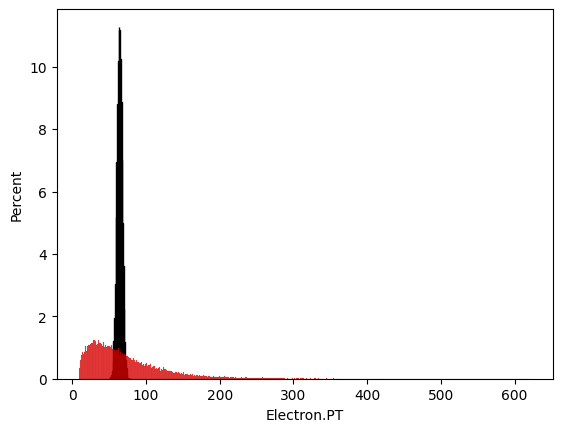

In [318]:
sns.histplot(data=minority_synth_data, x="Electron.PT", stat="percent", discrete=True,color="green")
sns.histplot(data=df, x="Electron.PT", stat="percent", discrete=True,color="red")

<AxesSubplot:xlabel='MissingET.MET', ylabel='Percent'>

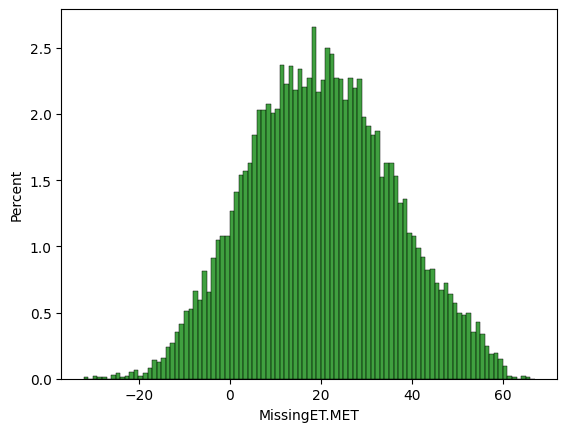

In [260]:
sns.histplot(data=minority_synth_data, x="MissingET.MET", stat="percent", discrete=True,color="green")


<AxesSubplot:xlabel='MissingET.MET', ylabel='Percent'>

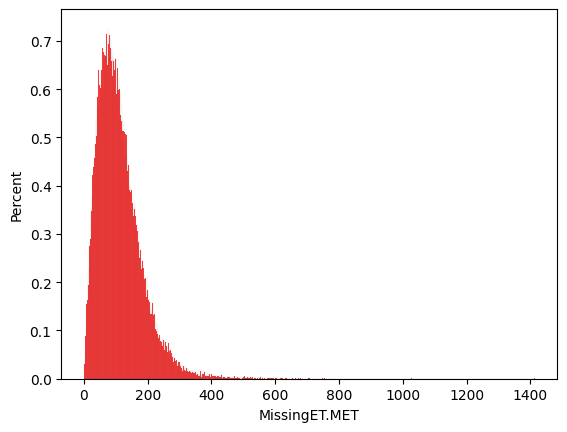

In [261]:
sns.histplot(data=df, x="MissingET.MET", stat="percent", discrete=True,color="red")

In [ ]:
#10 epoch üzerinden

<AxesSubplot:xlabel='MissingET.MET', ylabel='Percent'>

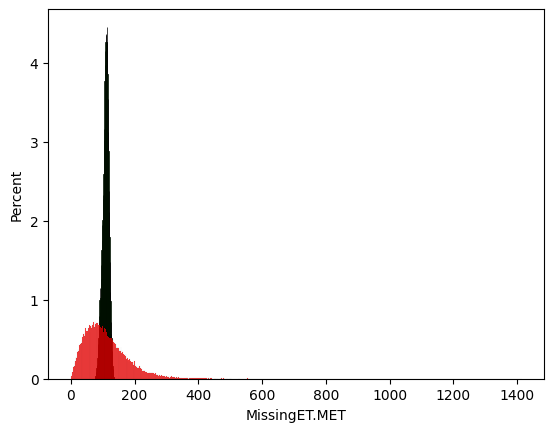

In [239]:

sns.histplot(data=minority_synth_data, x="MissingET.MET", stat="percent", discrete=True,color="green")
sns.histplot(data=df, x="MissingET.MET", stat="percent", discrete=True,color="red")

In [ ]:
sns.distplot(minority_synth_data['Muon.PT'],color = 'red')
sns.distplot(df["Muon.PT"],color="yellow")

In [ ]:
sns.distplot(minority_synth_data['FastJet.PT'],color = 'red')
sns.distplot(df["FastJet.PT"],color="yellow")

/Users/mertdil/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MissingET.Eta', ylabel='Density'>

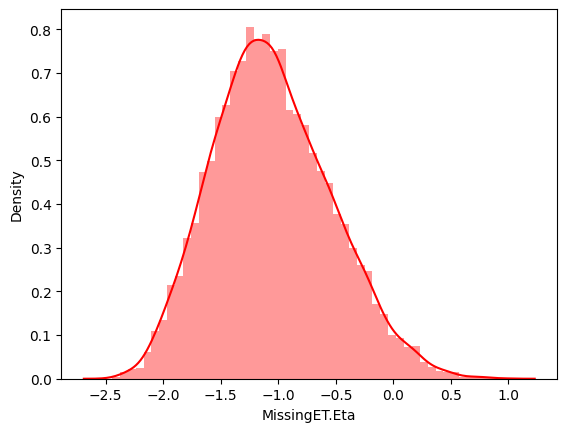

In [264]:
sns.distplot(minority_synth_data['MissingET.Eta'],color = 'red')


/Users/mertdil/opt/anaconda3/envs/python37/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MissingET.Eta', ylabel='Density'>

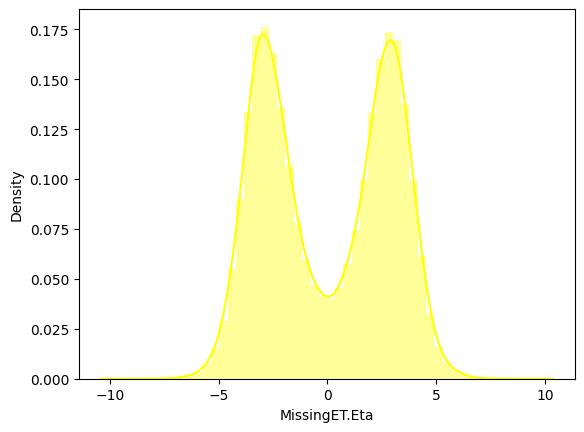

In [265]:
sns.distplot(df["MissingET.Eta"],color="yellow")

In [192]:
sns.displot(data=df, x="MET", kde=True)
sns.displot(data=minority_synth_data, x="MET", kde=True)

ValueError: Could not interpret value `MET` for parameter `x`

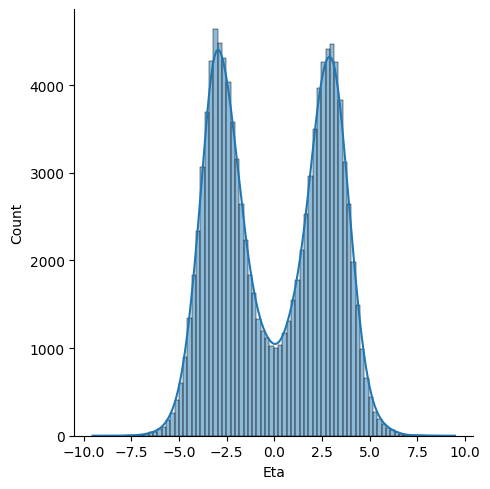

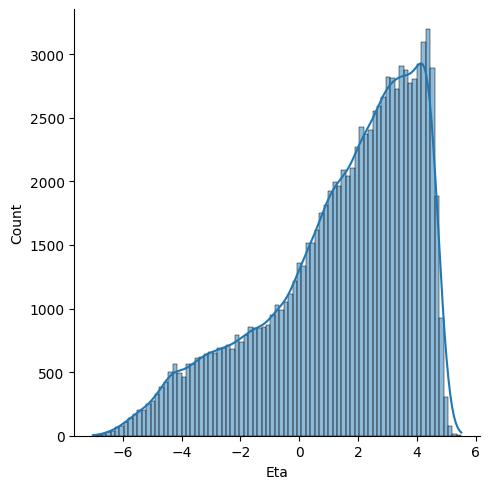

In [20]:
sns.displot(data=df, x="Eta", kde=True)
sns.displot(data=minority_synth_data, x="Eta", kde=True)

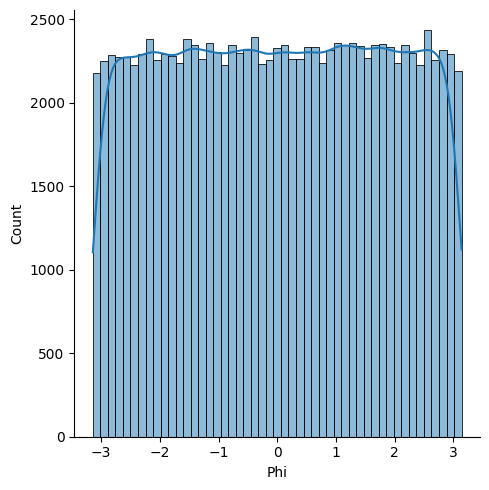

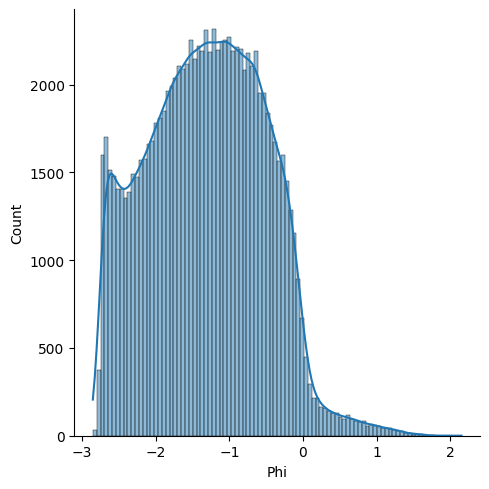

In [21]:
sns.displot(data=df, x="Phi", kde=True)
sns.displot(data=minority_synth_data, x="Phi", kde=True)

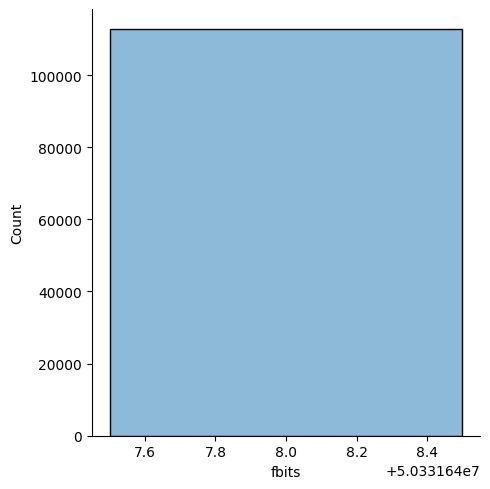

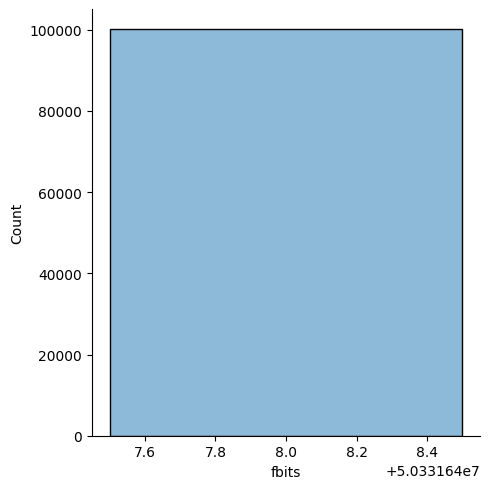

In [25]:
sns.displot(data=df, x="fbits", kde=True)
sns.displot(data=minority_synth_data, x="fbits", kde=True)

<AxesSubplot:xlabel='MET', ylabel='Count'>

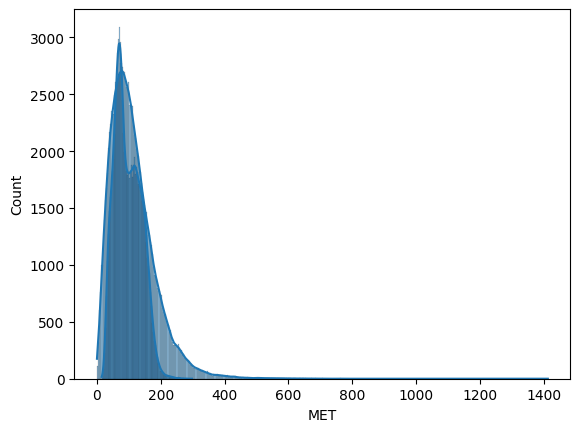

In [22]:
sns.histplot(data=df, x="MET", kde=True)
sns.histplot(data=minority_synth_data, x="MET", kde=True)

<AxesSubplot:xlabel='Eta', ylabel='Count'>

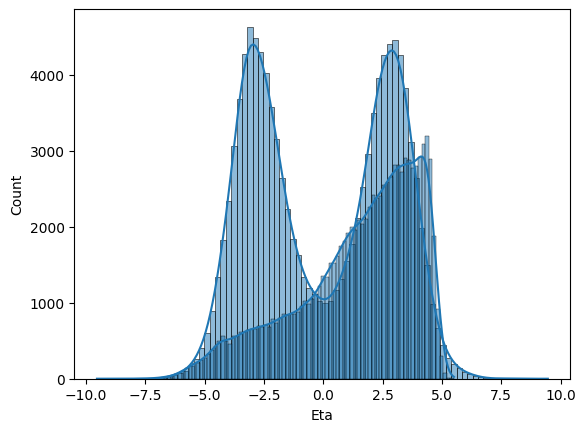

In [23]:
sns.histplot(data=df, x="Eta", kde=True)
sns.histplot(data=minority_synth_data, x="Eta", kde=True)

In [32]:
sns.histplot(data=df, x="Phi", kde=True)
sns.histplot(data=minority_synth_data, x="Phi", kde=True)

ValueError: Could not interpret value `Phi` for parameter `x`

# Generating 100k rows of majority data

In [7]:

#Selecting the rows of majority class from the data
train_data = df.copy()

#WGAN with Gradient Penalty is chosen as the GAN architecture
model = WGAN_GP

#Setting the parameters of the GAN model
noise_dim = 32
dim = 128
batch_size = 128

log_step = 100
epochs = 100
learning_rate = 5e-4
beta_1 = 0.5
beta_2 = 0.9
models_dir = './cache'

#Setting the model parameters and the training step parameters of the GAN model
gan_args = ModelParameters(batch_size=batch_size, lr=learning_rate, betas=(beta_1, beta_2),
                           noise_dim=noise_dim,layers_dim=dim)

train_args = TrainParameters(epochs=epochs, sample_interval=log_step)

#Initializing the GAN model
synthesizer = model(gan_args, n_critic = 10)

#Training the GAN model
synthesizer.train(data = train_data, train_arguments = train_args, num_cols = num_cols, cat_cols = cat_cols)

#Generating synthetic data of 100k examples of non-diabetic patients
majority_synth_data = synthesizer.sample(100"000)

2022-12-04 15:58:52.347559: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


NameError: name 'num_cols' is not defined